# Shallow Water Gravity Waves
EAS 4610<br>
Miriam Blaine<br>
Eric Mei

## Introduction
Coastal zones comprise only a small part of Earth’s land mass but are rich in natural resources, leading to high populations and considerable commercial and industrial activity. To ensure the proper management of these resources, it is critical to understand and predict the processes leading to coastal change. One such process is ocean waves at the shoreline, largely produced by wind, which can be simply approximated as shallow water gravity waves. More comprehensive modeling of these waves can incorporate wave-wave interactions, shoaling, wave breaking, and bottom friction. To predict coastal change more accurately, modeling systems coupling atmospheric models, ocean models, and wave models have been developed. The objective of this study is to model perturbations in shoreline water height as shallow water gravity waves for constant and space-varying equilibrium height. 

## Equations
Equations describing shallow-water gravity waves can be described by Holton (2004) with one-dimensional momentum and continuity equations $(7.17)$ and $(7.19)$:

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + w\frac{\partial u}{\partial z} = -\frac{g \delta \rho}{\rho_1} \frac{\partial h}{\partial x} \tag{7.17}$$
$$\frac{\partial h}{\partial t} + \frac{\partial}{\partial x}(hu) = 0 \tag{7.19}$$

Where $u$ is the zonal velocity in the x-direction and $h$ is the depth of water. <br>
To simplify the analysis, $u$ and $h$ are expressed in the perturbation forms:
$$u = \bar{u} + u^{\prime},\, h = H + h^{\prime}$$
In this decomposition, $\bar{u} = 0, H \gg |h^{\prime}|$, and $u'$ is very small. Additionally, it is assumed that $H$ varies only in the space dimension. $u^{\prime}$ and $h^{\prime}$ vary with space and time. <br>

For simplicity, partial differentials may be referenced with the following notation henceforth:

$$\frac{\partial u^{\prime}}{\partial t} = u_t', \frac{\partial^2 u^{\prime}}{\partial t^2} = u_{tt}^{\prime}, etc.$$

Substituting the perturbation forms into $(7.17)$,

$$\frac{\partial u^{\prime}}{\partial t} + g(\frac{\partial H}{\partial x} + \frac{\partial h^{\prime}}{\partial x}) = u_t +  g(H_x + h_x^{\prime}) = 0 \tag{1}$$

Likewise, substituting the perturbation forms into $(7.19)$,

$$\frac{\partial}{\partial x}(hu) = H\frac{\partial \bar{u}}{\partial x} + \bar{u} \frac{\partial H}{\partial x} + H \frac{\partial u^{\prime}}{\partial x} + u^{\prime}\frac{\partial H}{\partial x} + \bar{u} \frac{\partial h^{\prime}}{\partial x} + h^{\prime} \frac{\partial \bar{u}}{\partial x} = H \frac{\partial u^{\prime}}{\partial x} $$
$$\frac{\partial h^{\prime}}{\partial t} + \bar{u} \frac{\partial H}{\partial x} + H \frac{\partial u^{\prime}}{\partial x} + \bar{u} \frac{\partial h^{\prime}}{\partial x} = h_t^{\prime} + Hu_x^{\prime} = 0 \tag{2}$$

To eliminate the $u'$ terms, $(1)$ is differentiated with $x$:

$$u_{xt}^{\prime} + g(H_{xx} + h_{xx}^{\prime}) = 0 \tag{3}$$


$(2)$ is differentiated with $t$ to isolate $u_{xt}'$:

$$h_{tt}^{\prime} + Hu_{xt}^{\prime} = 0$$
$$u_{xt}^{\prime} = -\frac{1}{H}(h_{tt}^{\prime}) \tag{4}$$

$(4)$ is substituted into $(3)$:

$$h_{tt}' - gH(H_{xx} + h_{xx}') = 0 \tag{5}$$

which can be re-expressed as

$$\frac{\partial^2}{\partial t^2}h^{\prime} - gH\frac{\partial^2}{\partial x^2}(H + h^{\prime}) = 0 \tag{6}$$

## Numerical Methods

Equation $(6)$ is very similar to a basic wave equation, with a main deviation being the changing $\lambda$ term for each gridpoint as $H$ changes. Thus, a centered difference method is used to discretize the function due to the presence of second order partial derivatives.

In the discretized forms, $h'$ notation is substituted with $h^k_i$ to avoid subscipt and superscript confusion. $(6)$ is discretized below with $k$ representing time gridpoints and $i$ representing space gridpoints:

$$\frac{1}{\Delta t^2}(h^{k - 1}_i - 2h^k_i + h^{k+1}_i) - \frac{gH^k_i}{\Delta x^2}(H_{i-1} - 2H_i + H_{i+1} + h^k_{i-1} - 2h^k_i + h^k_{i+1}) = 0 \tag{7}$$

The wave speed is expressed by $c = \sqrt{gH}$. By introducing $\lambda = \frac{c\Delta t}{\Delta x} = \frac{\sqrt{gH}\Delta t}{\Delta x}$, $(7)$ may be re-expressed as

$$h^{k + 1}_i = 2(1 - \lambda^2)h^k_i + \lambda^2(h^k_{i-1} + h^k_{i+1} + H_{i-1} -2H_i + H_{i+1}) - h^{k+1}_i \tag{8}$$

$k$ represents iterations in time, while $i$ represents iterations in space. $(8)$ can be expressed as a matrix marching equation for a system with $m$ space grid points and $n$ time grid points:

\begin{gather}
 \begin{bmatrix}
 h^{k+1}_1 \\
 h^{k+1}_2 \\
 \vdots \\
 h^{k+1}_m \\
 \end{bmatrix}
 =
 M_1
 \begin{bmatrix}
 h^k_1 \\
 h^k_2 \\
 \vdots \\
 h^k_m \\
 \end{bmatrix}
 +
 M_2
 \begin{bmatrix}
 H_1 \\
 H_2 \\
 \vdots \\
 H_m\\
 \end{bmatrix}
 -
 \begin{bmatrix}
 h^{k-1}_1 \\
 h^{k-1}_2 \\
 \vdots \\
 h^{k-1}_m \\
 \end{bmatrix}
 \tag{9}
\end{gather}

$$
M_1 = 
\begin{bmatrix}
 2(1 - \lambda^2) & \lambda^2 & 0 & 0 \\
 \lambda^2 & \ddots & \ddots &  0 \\
 0 & \ddots & \ddots & \lambda^2 \\
 0 & 0 & \lambda^2 & 2(1 - \lambda^2) \\
 \end{bmatrix}\;
 \text{and} \;
 M_2 = 
\begin{bmatrix}
 -2\lambda^2 & \lambda^2 & 0 & \dots & 0 \\
 \lambda^2 & \ddots & \ddots & \ddots & \vdots \\
 0 & \ddots & \ddots & \ddots & 0 \\
 \vdots & \ddots & \ddots & \ddots & \lambda^2 \\
 0 & \dots & 0 & \lambda^2 & -2\lambda^2 \\
 \end{bmatrix}
$$

$$
\text{where} \;
\lambda = \frac{\sqrt{gH_i} \Delta t}{\Delta x}
\; \text{where} \: i \: \text{is the corresponding matrix row number}
$$

To remedy the lack of $H_{i - 1}$ and $H_{i + 1}$ values at the leftmost and rightmost space boundaries respectively, it is assumed that the change in $H$ between the grid points immediately within the boundary and on the boundary is equal to the change between the grid points immediately outside the boundary and on the boundary. In other words, $\frac{\partial^2 H}{\partial x^2} = 0$ for the leftmost and rightmost boundary points. Thus, the first and last rows of matrix $M_2$ are zero.

Equation $(9)$ has mirror boundary conditions on both sides of the model. To more realistically model the coast, the rightmost boundary condition is modeled as an open ocean, where waves "continue" unimpeded past the boundary. From (), the boundary can be modelled by a Mer boundary condition given by $(3.7)$:

$$\frac{\partial h'}{\partial x} = -\frac{1}{c}\frac{\partial h'}{\partial t} \tag{3.7}$$

Because waves proceed from upstream to downstream, $(3.7)$ is discretized with an upwind scheme:

$$\frac{h^k_i - h^k_{i-1}}{\Delta x} = -\frac{1}{c}\frac{h^{k+1}_i - h^k_i}{\Delta t}$$
$$h^{k+1}_i = (1-\lambda)h^k_i +\lambda h^k_{i-1} \tag{10}$$

The leftmost boundary condition is modeled as a perfectly reflecting seawall, which replaces the top right diagonal with $2 - \lambda^2$ Thus, with both new boundary conditions enforced, the following modifications are applied to $M_1$ and equaion $(9)$

\begin{gather}
 \begin{bmatrix}
 h^{k+1}_1 \\
 h^{k+1}_2 \\
 \vdots \\
 h^{k+1}_m \\
 \end{bmatrix}
 =
 M_1
 \begin{bmatrix}
 h^k_1 \\
 h^k_2 \\
 \vdots \\
 h^k_m \\
 \end{bmatrix}
 +
 M_2
 \begin{bmatrix}
 H_1 \\
 H_2 \\
 \vdots \\
 H_m\\
 \end{bmatrix}
 -
 \begin{bmatrix}
 h^{k-1}_1 \\
 h^{k-1}_2 \\
 \vdots \\
 h^{k-1}_{m-1} \\
 0\\
 \end{bmatrix}
 \tag{11}
\end{gather}

$$
M_1 = 
\begin{bmatrix}
 2 - \lambda^2 & \lambda^2 & 0 & \dots & 0 \\
 \lambda^2 & 2(1 - \lambda^2) & \lambda^2 & \ddots & \vdots \\
 0 & \ddots & \ddots & \ddots & 0 \\
 \vdots & \ddots & \lambda^2 & 2(1 - \lambda^2) & \lambda^2 \\
 0 & \dots & 0 & \lambda & 1 - \lambda \\
 \end{bmatrix}\;
 \text{and} \;
 M_2 = 
\begin{bmatrix}
 0 & 0 & 0 & 0 & 0 \\
 \lambda^2 & -2\lambda^2 & \lambda^2 & \ddots & \vdots \\
 0 & \ddots & \ddots & \ddots & 0 \\
 \vdots & \ddots & \lambda^2 & -2\lambda^2 & \lambda^2 \\
 0 & 0 & 0 & 0 & 0 \\
 \end{bmatrix}
$$

## Results
To test the model, four different scenarios are used:
1. H is constant $\frac{\partial H}{\partial x} = 0$ and $\frac{\partial^2 H}{\partial x^2} = 0$
2. H has a fixed slope $\frac{\partial H}{\partial x} \neq 0$ and $\frac{\partial^2 H}{\partial x^2} = 0$
3. H has a discontinuous slope of two fixed slopes $\frac{\partial H}{\partial x} \neq 0$ and $\frac{\partial^2 H}{\partial x^2} \neq 0$
4. H has a non-linear slope $\frac{\partial H}{\partial x} \neq 0$ and $\frac{\partial^2 H}{\partial x^2} \neq 0$

For consistency, each scenario has the same grid spacing for time and space, and final time and space values are consistent. The following code block computes each model. Analysis and plots are performed after.

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from numpy import linalg as LA
from matplotlib import animation
from matplotlib.animation import FuncAnimation

# Enable interactive plot
%matplotlib notebook

#set constants
g = 9.8 #m/s^2
dx = .05 #km
dt = .01 #s
tf = 100 #s
xf = 20 #km

#convert to SI units
dx = dx*1000 #m
xf = xf*1000 #m

#initialize grids
x = np.arange(0,xf+dx,dx)
t = np.arange(0,tf+dt,dt)
nx = len(x)
nt = len(t)

## 1. CONSTANT H
H_1 = 1500*np.ones(nx) #m

#define lambda and lambda^2
lamb_1 = np.sqrt(g*H_1)*dt/dx
lamb2_1 = np.square(lamb_1) #g*H*dt**2/dx**2

#create matrices
M1 = np.zeros((nx, nx))
for i in np.arange(0, nx):
    for j in np.arange(0, nx):
        if i == j:
            M1[i, j] = 2*(1 - lamb2_1[i])
        elif abs(i - j) == 1:
            M1[i, j] = lamb2_1[i]
M1[0, 0] = 2 - lamb2_1[0]
M1[nx - 1, nx - 2] = lamb_1[-1]
M1[nx - 1, nx - 1] = 1-lamb_1[-1]

M2 = np.zeros((nx, nx))
for i in np.arange(1, nx - 1):
    for j in np.arange(0, nx):
        if i == j:
            M2[i, j] = -2*lamb2_1[i]
        elif abs(i - j) == 1:
            M2[i, j] = lamb2_1[i]

#inital conditions
h_1 = np.zeros((nx,nt))
h_1[:,0] = np.exp(-(x/1000-10)**2 / 2) #+ np.exp(-(x/1000-15)**2 / 2)
h_1[:,1] = np.exp(-(x/1000-10)**2 / 2) #+ np.exp(-(x/1000-15)**2 / 2) #implies that u_t(t=0) = 0

#run
for k in np.arange(1,nt - 1): 
    h_1[:,k+1] = M1@h_1[:, k] + M2@H_1 - np.concatenate((h_1[0:-1, k-1], np.array([0])))

## 2. CONSTANT SLOPE H
H_2 = np.linspace(10000,35000,nx) #m

#define lambda and lambda^2
lamb_2 = np.sqrt(g*H_2)*dt/dx
lamb2_2 = np.square(lamb_2) 

#create matrices
M1 = np.zeros((nx, nx))
for i in np.arange(0, nx):
    for j in np.arange(0, nx):
        if i == j:
            M1[i, j] = 2*(1 - lamb2_2[i])
        elif abs(i - j) == 1:
            M1[i, j] = lamb2_2[i]
M1[0, 0] = 2 - lamb2_2[0]
M1[nx - 1, nx - 2] = lamb_2[-1]
M1[nx - 1, nx - 1] = 1-lamb_2[-1]

M2 = np.zeros((nx, nx))
for i in np.arange(1, nx - 1):
    for j in np.arange(0, nx):
        if i == j:
            M2[i, j] = -2*lamb2_2[i]
        elif abs(i - j) == 1:
            M2[i, j] = lamb2_2[i]

#inital conditions
h_2 = np.zeros((nx,nt))
h_2[:,0] = np.exp(-(x/1000-10)**2 / 2) #+ np.exp(-(x/1000-15)**2 / 2)
h_2[:,1] = np.exp(-(x/1000-10)**2 / 2) #+ np.exp(-(x/1000-15)**2 / 2) #implies that u_t(t=0) = 0

#run
for k in np.arange(1,nt - 1): 
    h_2[:,k+1] = M1@h_2[:, k] + M2@H_2 - np.concatenate((h_2[0:-1, k-1], np.array([0])))

## 3. DISCONTINUOUS H
H1 = np.linspace(10000,20000,math.floor(nx/2)) #m
H2 = np.linspace(20000,35000,math.ceil(nx/2)) #m
H_3 = np.concatenate((H1, H2))

#define lambda and lambda^2
lamb_3 = np.sqrt(g*H_3)*dt/dx
lamb2_3 = np.square(lamb_3) 

#create matrices
M1 = np.zeros((nx, nx))
for i in np.arange(0, nx):
    for j in np.arange(0, nx):
        if i == j:
            M1[i, j] = 2*(1 - lamb2_3[i])
        elif abs(i - j) == 1:
            M1[i, j] = lamb2_3[i]
M1[0, 0] = 2 - lamb2_3[0]
M1[nx - 1, nx - 2] = lamb_3[-1]
M1[nx - 1, nx - 1] = 1-lamb_3[-1]

M2 = np.zeros((nx, nx))
for i in np.arange(1, nx - 1):
    for j in np.arange(0, nx):
        if i == j:
            M2[i, j] = -2*lamb2_3[i]
        elif abs(i - j) == 1:
            M2[i, j] = lamb2_3[i]

#inital conditions
h_3 = np.zeros((nx,nt))
h_3[:,0] = np.exp(-(x/1000-10)**2 / 2) #+ np.exp(-(x/1000-15)**2 / 2)
h_3[:,1] = np.exp(-(x/1000-10)**2 / 2) #+ np.exp(-(x/1000-15)**2 / 2) #implies that u_t(t=0) = 0

#run
for k in np.arange(1,nt - 1): 
    h_3[:,k+1] = M1@h_3[:, k] + M2@H_3 - np.concatenate((h_3[0:-1, k-1], np.array([0])))
    
## 4. NON-LINEAR H
H_4 = 1500*np.ones(nx) #m, placeholder

#define lambda and lambda^2
lamb_4 = np.sqrt(g*H_4)*dt/dx
lamb2_4 = np.square(lamb_4) 

#create matrices
M1 = np.zeros((nx, nx))
for i in np.arange(0, nx):
    for j in np.arange(0, nx):
        if i == j:
            M1[i, j] = 2*(1 - lamb2_4[i])
        elif abs(i - j) == 1:
            M1[i, j] = lamb2_4[i]
M1[0, 0] = 2 - lamb2_4[0]
M1[nx - 1, nx - 2] = lamb_4[-1]
M1[nx - 1, nx - 1] = 1-lamb_4[-1]

M2 = np.zeros((nx, nx))
for i in np.arange(1, nx - 1):
    for j in np.arange(0, nx):
        if i == j:
            M2[i, j] = -2*lamb2_4[i]
        elif abs(i - j) == 1:
            M2[i, j] = lamb2_4[i]

#inital conditions
h_4 = np.zeros((nx,nt))
h_4[:,0] = np.exp(-(x/1000-10)**2 / 2) #+ np.exp(-(x/1000-15)**2 / 2)
h_4[:,1] = np.exp(-(x/1000-10)**2 / 2) #+ np.exp(-(x/1000-15)**2 / 2) #implies that u_t(t=0) = 0

#run
for k in np.arange(1,nt - 1): 
    h_4[:,k+1] = M1@h_4[:, k] + M2@H_4 - np.concatenate((h_4[0:-1, k-1], np.array([0])))

### 1. Constant H

<IPython.core.display.Javascript object>


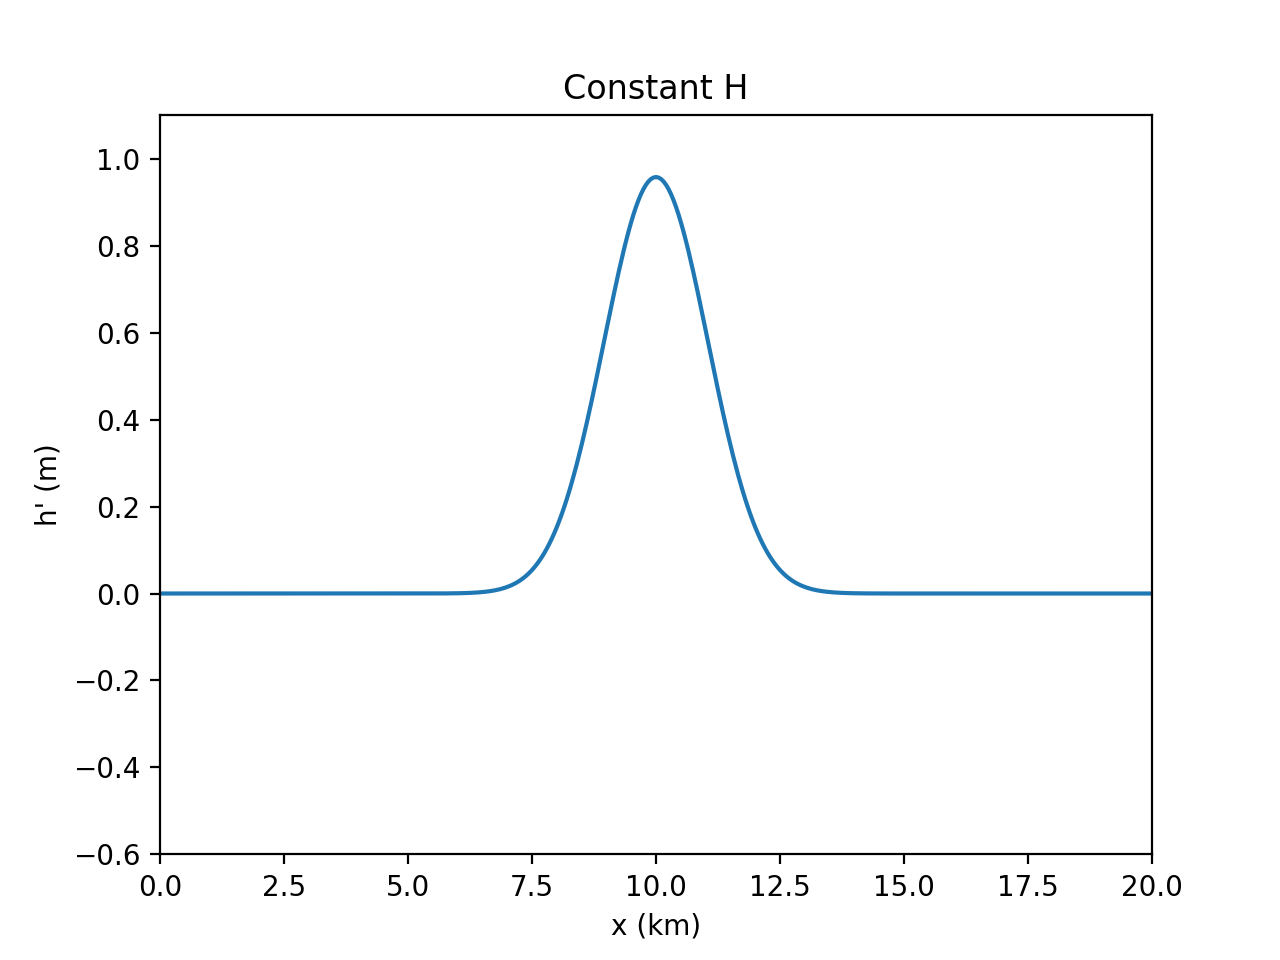

In [14]:
#animate
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_title("Constant H")
ax.set_xlim(0, 20)
ax.set_ylim(-0.6, 1.1)
ax.set_xlabel("x (km)")
ax.set_ylabel("h\' (m)")

def animate(frame_num):
    #y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x/1000, h_1[:, frame_num]))
    return line

anim = FuncAnimation(fig, animate, frames=10000, interval=0.5)
plt.show()

### 2. Constant Slope H

<IPython.core.display.Javascript object>


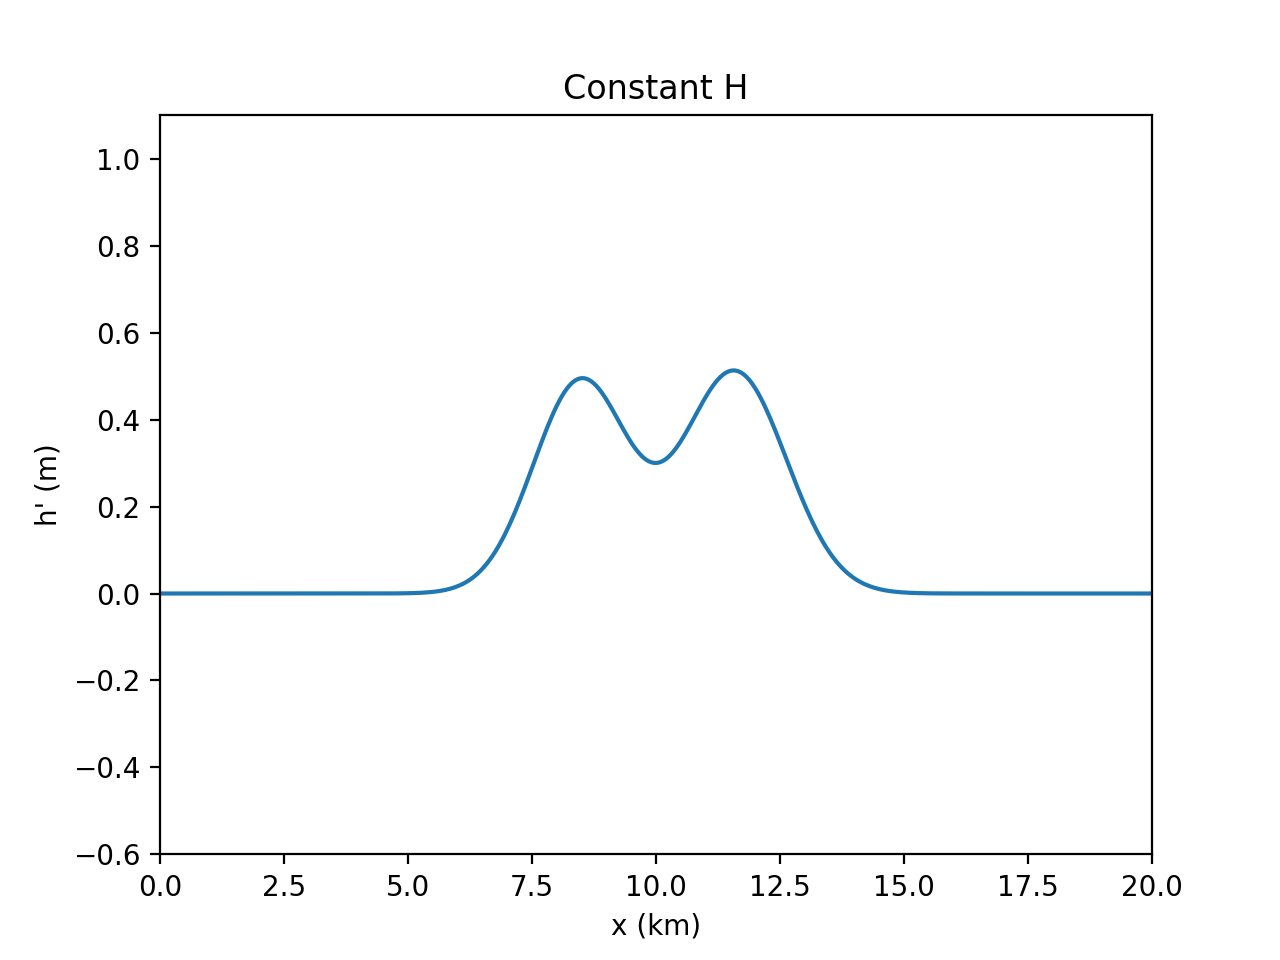

In [15]:
#animate
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_title("Constant Slope H")
ax.set_xlim(0, 20)
ax.set_ylim(-0.6, 1.1)
ax.set_xlabel("x (km)")
ax.set_ylabel("h\' (m)")

def animate(frame_num):
    #y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x/1000, h_2[:, frame_num]))
    return line

anim = FuncAnimation(fig, animate, frames=10000, interval=0.5)
plt.show()

### 3. Discontinuous H

In [ ]:
#animate
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_title("Discontinuous H")
ax.set_xlim(0, 20)
ax.set_ylim(-0.6, 1.1)
ax.set_xlabel("x (km)")
ax.set_ylabel("h\' (m)")

def animate(frame_num):
    #y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x/1000, h_3[:, frame_num]))
    return line

anim = FuncAnimation(fig, animate, frames=10000, interval=0.5)
plt.show()

### 4. Non-linear H

<IPython.core.display.Javascript object>


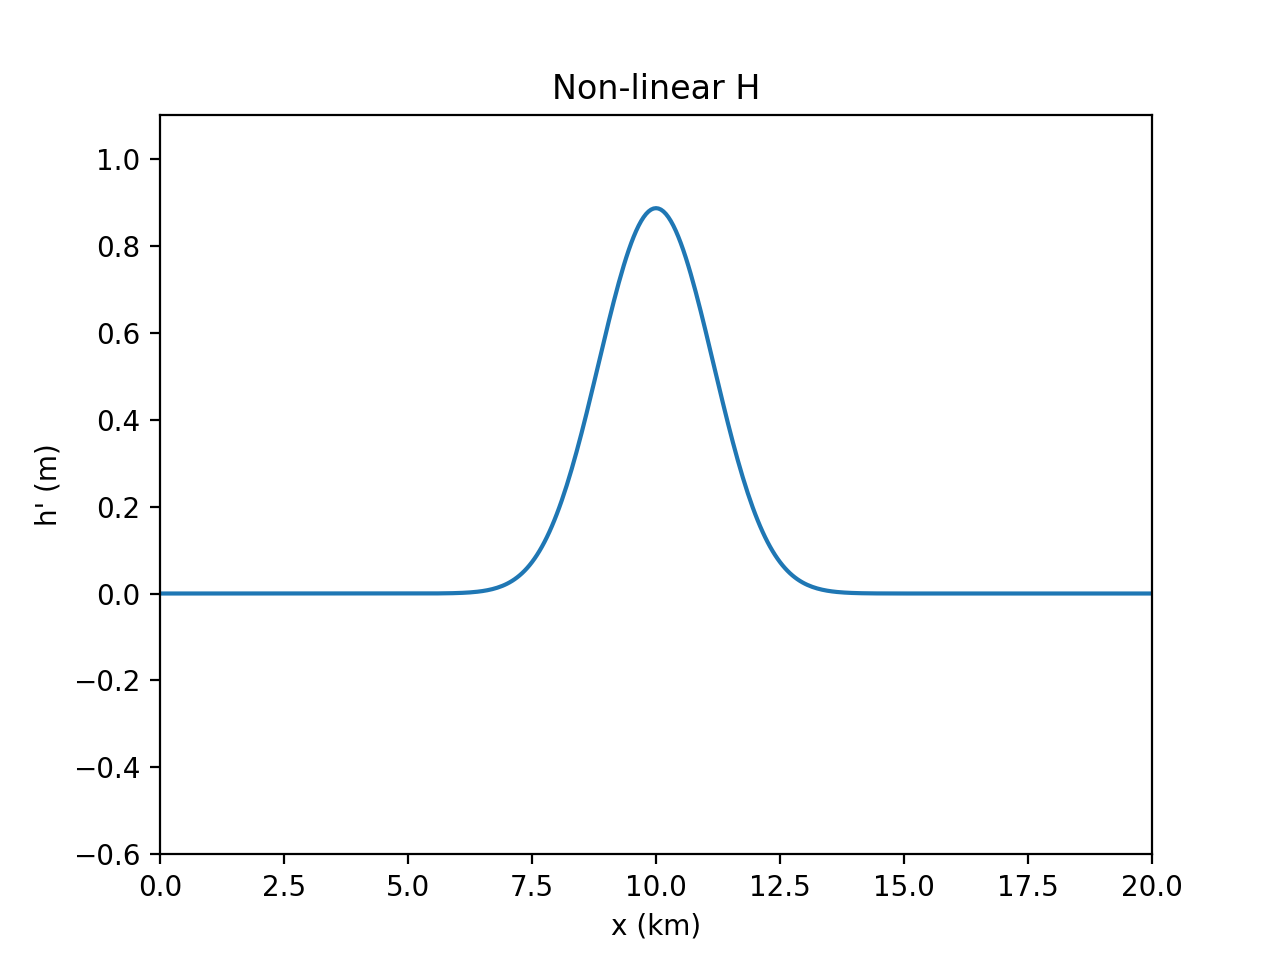

In [16]:
#animate
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_title("Non-linear H")
ax.set_xlim(0, 20)
ax.set_ylim(-0.6, 1.1)
ax.set_xlabel("x (km)")
ax.set_ylabel("h\' (m)")

def animate(frame_num):
    #y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x/1000, h_4[:, frame_num]))
    return line

anim = FuncAnimation(fig, animate, frames=10000, interval=0.5)
plt.show()

## References
Holton, J. R.: Chapter 7 Atmospheric oscillations: Linear perturbation theory, in: International Geophysics, edited by: Holton, J. R., Academic Press, 182-227, https://doi.org/10.1016/S0074-6142(04)80041-X, 2004.